In [1]:
#导入可能需要的包
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import requests   
from pprint import pprint
import re


# 1. 收集

In [3]:
# 通过编程方式获得文件，1）image-predictions.tsv
url = "https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv"
response = requests.get(url)
with open (os.path.join(url.split("/")[-1]),mode="wb" ) as file:
    file.write(response.content)   #把文本文件写入文件中去。存下来
    print("下载完毕！")
#!ls 

ProxyError: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv (Caused by ProxyError('Cannot connect to proxy.', NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001F27550B5C0>: Failed to establish a new connection: [WinError 10061] 由于目标计算机积极拒绝，无法连接。')))

In [ ]:
# 通过编程方式下载文件，2）twitter-archive-enhanced.csv 下载完成
url2 = "https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/twitter-archive-enhanced.csv"

# url = "https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv"
response2 = requests.get(url2)
with open (os.path.join(url2.split("/")[-1]),mode="wb" ) as file:
    file.write(response2.content)   #把文本文件写入文件中去。存下来
    print("下载完毕！")
#!ls   

In [ ]:
# 通过编程方式下载文件，3）twitter-archive-enhanced.csv 下载完成
url3 = "https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/tweet_json.txt"
response3 = requests.get(url3)
with open (os.path.join(url3.split("/")[-1]),mode="wb" ) as file:
    file.write(response3.content)   #把文本文件写入文件中去。存下来
    print("下载完毕！")
#!ls   #检查文件是否有下载到路径中去。

# 2.评估

### 陆续读取打开各个文件以查看数据情况

In [4]:
#先读取
#读取出这几个文件
twitter_achieve = pd.read_csv("twitter-archive-enhanced.csv")   
image_predictions  = pd.read_csv("image-predictions.tsv",sep="\t") 

twitter_achieve[twitter_achieve['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [5]:
twitter_achieve.head(3)   
#大概查看数据集情况，发现质量问题
# 1）质量问题：source 里面包含html的标签，可以进一步提取 
# 2）整洁性问题：狗的地位stage(体型而定的) 应该为分类数据，应该放在同一列中

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [6]:
twitter_achieve.name.value_counts() 
#3）质量问题：狗的名字可以相同，但是 有异常的 a，None  the an

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Penny        10
Tucker       10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
Bailey        7
Toby          7
an            7
Daisy         7
Buddy         7
Oscar         6
Koda          6
Stanley       6
Scout         6
Bella         6
Jack          6
Milo          6
Dave          6
Rusty         6
Leo           6
Jax           6
Sunny         5
           ... 
Carter        1
Tuco          1
Taco          1
Snickers      1
Kawhi         1
Jockson       1
Eriq          1
Tommy         1
Gunner        1
Socks         1
Butters       1
Mutt          1
Walker        1
Kane          1
Kanu          1
Brownie       1
Cal           1
Bloop         1
Griswold      1
Bloo          1
Karl          1
Autumn        1
Florence      1
Glenn         1
DayZ          1
Tedrick       1
Chadrick      1
Laela         1
Roscoe        1
Grizzie       1
Name: name, Length: 957,

In [7]:
twitter_achieve.retweeted_status_user_id.notnull().value_counts()  
# 4)retweeted_status_user_id 不为空的是 转发的推文 ，需要清理掉，只留下非转发的推文

False    2175
True      181
Name: retweeted_status_user_id, dtype: int64

In [8]:
twitter_achieve.info()
# 5）质量问题： 发现in_reply_to_status_id     in_reply_to_user_id   都只有78条，基本都是空值，需要清理
# 6) 质量问题： tweet_id 用户id应该为字符串类型，而不是int64 数值类型，所以需要修改。后面读取完三个表后同样发现都需要统一成字符串类型
# 7) 质量问题： expanded_urls是推文的链接地址，存在缺失值，缺失的行可能已经失效，需要处理

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
twitter_achieve.expanded_urls
# 8)整洁性问题，expanded_urls里面有写链接有多条链接重复在一起,用逗号分隔的，如6这种。

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
5       https://twitter.com/dog_rates/status/891087950...
6       https://gofundme.com/ydvmve-surgery-for-jax,ht...
7       https://twitter.com/dog_rates/status/890729181...
8       https://twitter.com/dog_rates/status/890609185...
9       https://twitter.com/dog_rates/status/890240255...
10      https://twitter.com/dog_rates/status/890006608...
11      https://twitter.com/dog_rates/status/889880896...
12      https://twitter.com/dog_rates/status/889665388...
13      https://twitter.com/dog_rates/status/889638837...
14      https://twitter.com/dog_rates/status/889531135...
15      https://twitter.com/dog_rates/status/889278841...
16      https://twitter.com/dog_rates/status/888917238...
17      https:

In [10]:
twitter_achieve.rating_denominator.value_counts() 
# 9）质量问题：评分的分母除了10，还有少量不为10，如11，2，7，10的倍数等，需要重新检查或者重新提取

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
image_predictions.info()     #评估image_predictions  表
image_predictions.head(4)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True


In [12]:

image_predictions[image_predictions['jpg_url'].duplicated()==True]['jpg_url'].value_counts()
# 10）image_predictions 有很多重复的图片链接有 66条之多，需要删除

https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg                                            1
https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg                                            1
https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg                                            1
https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg                                            1
https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg                                            1
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            1
https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg                                            1
https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg                                            1
https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg                                            1
https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg                                            1
https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/Jle

In [13]:
print(image_predictions[image_predictions['jpg_url'].isnull()]['jpg_url'].value_counts())   #图片链接验证没有为空的。不用处理

Series([], Name: jpg_url, dtype: int64)


In [14]:
image_predictions[(image_predictions['p1_dog']==False)&(image_predictions['p2_dog']==False)&(image_predictions['p3_dog']==False) ]
# 11) 质量问题： image_predictions 中预测完全不属于狗的 数据有324条，需要处理删除处理

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [15]:
# 读取出各个文件。  

tweetIdList = []    #这个是装提取出来的id的
tweetReTList = []   #这个是转推次数的提取
tweetFavList = []   # 喜欢数的提取。
tweetTextList =[]
with open('tweet_json.txt') as json_file:      #直接打开文件的方式打开失败，于是改用按行读取的方式
    for oneLine in json_file.readlines():
        tempDic= json.loads(oneLine)   #每部分都是字典的东西放在这儿。
        tempID = tempDic['id_str']       #根据需求分别提取推文用户id,喜欢数，转发数
        tempRe = tempDic['retweet_count']
        tempFa = tempDic['favorite_count']
        tweetIdList.append(tempID)
        tweetReTList.append(tempRe)
        tweetFavList.append(tempFa)

tweet_json = pd.DataFrame({'tweet_id':tweetIdList,'retweet_count':tweetReTList,'favorite_count':tweetFavList})
tweet_json   #从tweet_json.txt 中提取出 用户id，喜欢数，转发数
# 12)发现问题 ，整洁度问题： 三个表格有相同tweet_id的字段，可以合并成一个进行操作。

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016
5,891087950875897856,3240,20548
6,890971913173991426,2142,12053
7,890729181411237888,19548,66596
8,890609185150312448,4403,28187
9,890240255349198849,7684,32467


In [16]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null object
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


# 3.清洗 

### 将上面评估时发现的数据问题汇总如下
问题定义

#### 质量问题：
-  1)质量问题： tweet_id 用户id应该为字符串类型，而不是int64 数值类型，所以需要修改。
-  2)质量问题： expanded_urls是推文的链接地址，存在缺失值，缺失的行可能已经失效，需要处理
-  3)质量问题： source 里面包含html的标签，可以进一步提取出去html标签的文本内容，表示来源。 
-  4)质量问题： jpg_url是发现有重复值，需要清理。
-  5)retweeted_status_user_id 不为空的是 转发的推文 ，需要清理掉，只留下非转发的推文 

-  6)质量问题： 质量问题：狗的名字可以相同，但是 有异常的 a，None  the an
-  7)质量问题： 发现in_reply_to_status_id     in_reply_to_user_id   都只有78条，基本都是空值，需要清理
-  8)质量问题： image_predictions 三次预测中完全不属于狗的 数据有324条，需要处理删除处理

-  9)质量问题： 评分的分母除了10和10的倍数的，还有少量不为10，如11，2，7需要重新检查或者重新提取   



#### 整洁性问题：

-  10)三个表格有相同tweet_id的字段，可以合并成一个进行操作。
-  11) expanded_urls 中有些列里面有多个相同的expanded_urls 观察到。
-  12) 整洁性问题：狗的地位stage(体型而定的) 应该为分类数据，应该放在同一列中


下面总体按照顺序进行处理，但是因为有些处理完了才能继续处理后面的，所以些许顺序对不上，如下tweet_id因为合并需要格式相同，故提前处理，不过总共是可以确认处理完了8个质量问题，和2个整洁性问题的。

In [17]:
# 展开所有的column
pd.options.display.max_columns=500
pd.set_option('max_colwidth',200)

In [18]:
#定义: 1)质量问题： tweet_id 用户id应该为字符串类型，而不是int64 数值类型，所以需要修改。
#定义:      9)整洁性问题： 合并三个表

# 编码      解决tweet_id 数据类型不对和   合并三个数据集
tempTable  = pd.merge(twitter_achieve,image_predictions,on="tweet_id")   #类型需要转换成相同的才可以。
tempTable_clean = tempTable.copy()         #复制一份
tempTable_clean['tweet_id'] = tempTable_clean['tweet_id'].apply(str)     #把前两列合并成的tweet_id 格式转成字符串类型。 
tempTable_all  = pd.merge(tempTable_clean,tweet_json,on="tweet_id")
final_Data_clean = tempTable_all.copy()    #复制一份，不改变原来数据集
final_Data_clean.info()  

#测试   检查数据集格式tweet_id 是否为字符串类型，已确认修改成功；合并三个表，已确认，成功。
final_Data_clean.head(4)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8842,39492
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6480,33786
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4301,25445
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8925,42863


In [19]:
# 定义:  2)质量问题： expanded_urls是推文的链接地址，存在缺失值，缺失的行可能已经失效，需要处理

#编码
final_Data_clean  =  final_Data_clean[final_Data_clean['expanded_urls'].notnull()]   #把缺失值的 expanded_urls 去掉。留下没有缺失的。

#测试
final_Data_clean.expanded_urls.isnull().value_counts()   #验证完毕，不再出现含有缺失值的 expanded_urls了。

False    2073
Name: expanded_urls, dtype: int64

In [20]:
# 定义：3）质量问题：source 里面包含html的标签，可以进一步提取 

#编码
urlString = '<a href="https://www.baidu.com/link?url=A3b9CWrhoCv4Oxw6z40oAU2_qNwN9756AJwaCLaPmBpK0bFjU8Rjv2LwWLL7fvHwgyq4cwaMfgO6_as6CpzUg_&amp;wd=&amp;eqid=be1ccee200026e65000000065c81f06b" target="_blank"><em>Beautiful Soup</em> Documentation — <em>Beautiful Soup</em> 4.4.0 ...</a>'
from bs4 import BeautifulSoup
def phraseHtml(string):   #编写函数用来提取source中a标签中的链接内容
    soup = BeautifulSoup(string,'lxml')  #使用BeautifulSoup来解析html
    url = soup.find("a").string
    return url

final_Data_clean['source'] = final_Data_clean['source'].apply(phraseHtml)   #  应用函数提取出a标签内url 。

#测试： 检查source是否提取成功url，已验证，提取成功。
print(final_Data_clean['source'].value_counts())
final_Data_clean.head(4)

Twitter for iPhone    2032
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8842,39492
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6480,33786
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4301,25445
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8925,42863


In [21]:
# 定义：4)质量问题： jpg_url是发现有重复值，需要清理。

#编码
print(final_Data_clean[final_Data_clean['jpg_url'].duplicated() ==True].iloc[:,0].size)# #检查到有79条之行的jpg_url是重复的。
final_Data_clean = final_Data_clean[final_Data_clean['jpg_url'].duplicated() ==False]   #直接保留没重复的jpg_url的数据

#测试
final_Data_clean[final_Data_clean['jpg_url'].duplicated() ==True]   #正确除去了包含jpg_url重复的内容

64


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


In [22]:
# 定义： 5) retweeted_status_user_id 不为空的是 转发的推文 ，需要清理掉，只留下非转发的推文

#编码
final_Data_clean = final_Data_clean[final_Data_clean['retweeted_status_user_id'].isnull()]     # 把去掉的改过去，

#测试，验证成功，已经删除了转发的推特文。
final_Data_clean[final_Data_clean['retweeted_status_user_id'].notnull()]  #

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


In [23]:
# 定义：6)质量问题：狗的名字可以相同，但是 有异常的 a，None  the an

#编码   
final_Data_clean['name'] = final_Data_clean['name'].replace(['a','None','the','an'],np.nan)  # 把name中的  a   None   the   用NaN进行填充 

#测试，已除去 a None the
final_Data_clean['name'].value_counts()   #这样就看不到空值了咯。

Charlie        11
Cooper         10
Oliver         10
Lucy           10
Winston         8
Penny           8
Tucker          8
Sadie           8
Daisy           7
Toby            7
Bella           6
Lola            6
Koda            6
Stanley         6
Jax             6
Leo             5
Louis           5
Chester         5
Oscar           5
Buddy           5
Bentley         4
Gary            4
Milo            4
Bailey          4
Duke            4
Finn            4
one             4
Gus             4
Oakley          4
Scout           4
               ..
Eriq            1
Clybe           1
Jockson         1
Canela          1
Ginger          1
Brownie         1
O               1
Covach          1
Fiji            1
Fabio           1
Hamrick         1
Bobbay          1
Jeremy          1
Ralphie         1
Grey            1
Ruffles         1
Remus           1
Jeffri          1
Kota            1
Kane            1
Mojo            1
Beya            1
Sparky          1
Alexander       1
Tommy     

In [24]:
# 定义 ：7)质量问题： 发现in_reply_to_status_id     in_reply_to_user_id   都只有78条，基本都是空值，需要清理

#编码
final_Data_clean= final_Data_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis='columns')

#测试，以通过，去掉了不需要的这两列
final_Data_clean.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1930 entries, 0 to 2072
Data columns (total 28 columns):
tweet_id                      1930 non-null object
timestamp                     1930 non-null object
source                        1930 non-null object
text                          1930 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1930 non-null object
rating_numerator              1930 non-null int64
rating_denominator            1930 non-null int64
name                          1333 non-null object
doggo                         1930 non-null object
floofer                       1930 non-null object
pupper                        1930 non-null object
puppo                         1930 non-null object
jpg_url                       1930 non-null object
img_num                       1930 non-null int64
p1                            1930 n

In [25]:
#定义 8)质量问题： image_predictions 中预测完全不属于狗的 数据有324条，需要处理删除处理

#编码
final_Data_clean[(final_Data_clean['p1_dog']==False)&(final_Data_clean['p2_dog']==False)&(final_Data_clean['p3_dog']==False)]  #图片识别为不是狗的，需要排除掉
final_Data_clean = final_Data_clean[(final_Data_clean['p1_dog']==True)|(final_Data_clean['p2_dog']==True)|(final_Data_clean['p3_dog']==True)]   #这里这儿只保留识别成是狗的种类的

#测试，验证成功，已经除去了三次识别都不是狗的数据。
final_Data_clean[(final_Data_clean['p1_dog']==False)&(final_Data_clean['p2_dog']==False)&(final_Data_clean['p3_dog']==False)]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


In [26]:
# 定义：10 )评分的分母除了10和10的倍数的，还有少量不为10，如11，2，7需要重新检查或者重新提取  <第9个合并三个表在1)那儿一起解决了>

#编码
print(final_Data_clean[final_Data_clean['rating_denominator']!=10].iloc[:,0].size)    #非0 数量不算多,所以直接目测手动处理
final_Data_clean[final_Data_clean['rating_denominator']!=10][['text','rating_numerator','rating_denominator']]

17


,text,rating_numerator,rating_denominator
344,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
414,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
734,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
876,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
967,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1001,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1022,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1047,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1065,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1131,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50


In [27]:
# 数量不多，故可以直接目测，目测结果，基本上没什么错误
# 出现错误的主要是 id=[876，967,1405,2052] 他们对应的正确的值应该是 values=["14/10",'13/10','10/10 ',' 9/10 ']  所以单独设置就可以
#修改值
final_Data_clean.loc[876,"rating_numerator" ] = 14   #修改分子和分母 
final_Data_clean.loc[876,"rating_denominator" ]= 10

final_Data_clean.loc[967,"rating_numerator" ] = 13   #修改分子和分母 
final_Data_clean.loc[967,"rating_denominator" ]= 10

final_Data_clean.loc[1405,"rating_numerator" ]   =10 #修改分子和分母 
final_Data_clean.loc[1405,"rating_denominator" ]= 10

final_Data_clean.loc[2052,"rating_numerator" ]=9    #修改分子和分母     😂因为不是顺序的，所以iloc会对应不上吗，loc，默认的是index
final_Data_clean.loc[2052,"rating_denominator" ]=10


#测试1
final_Data_clean[final_Data_clean['rating_denominator']!=10][['text','rating_numerator','rating_denominator']] #验证修改成功。

,text,rating_numerator,rating_denominator
344,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
414,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
734,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1001,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1022,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1047,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1065,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1131,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
1207,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
1379,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,130


In [28]:
# 用分子分母相除，结果存到新列中。
#测试2
final_Data_clean['Final_Grade']=final_Data_clean['rating_numerator']/final_Data_clean['rating_denominator']
final_Data_clean['Final_Grade']=final_Data_clean['Final_Grade'].apply(lambda x: '%.2f'%x   )   #结果保留两位小数
final_Data_clean['Final_Grade'].value_counts()   #评分结果。


1.20    407
1.00    356
1.10    348
1.30    214
0.90    134
0.80     68
0.70     31
1.40     22
0.60     16
0.50     14
0.40      6
0.30      5
0.20      2
0.00      1
7.50      1
3.43      1
2.60      1
2.70      1
Name: Final_Grade, dtype: int64

In [29]:
# 定义；11)整洁性问题： expanded_urls 中有些列里面有多个相同的expanded_url 观察到。(第9个整洁性问题在一开始的时候就合并解决)
final_Data_clean['expanded_urls']  # 可以看到内部有些，有很多个重复的相同的链接地址，并且之间是用逗号链接的。

#编码
def cleanExpanded_urls(string):
    if(string.find(",")!=-1):
        return string.split(",")[-1]
    else:
        return string
final_Data_clean['expanded_urls']  = final_Data_clean['expanded_urls']  .apply(cleanExpanded_urls)


#测试，已经清理完毕
final_Data_clean['expanded_urls'] 

1       https://twitter.com/dog_rates/status/892177421306343426/photo/1
2       https://twitter.com/dog_rates/status/891815181378084864/photo/1
3       https://twitter.com/dog_rates/status/891689557279858688/photo/1
4       https://twitter.com/dog_rates/status/891327558926688256/photo/1
5       https://twitter.com/dog_rates/status/891087950875897856/photo/1
6       https://twitter.com/dog_rates/status/890971913173991426/photo/1
7       https://twitter.com/dog_rates/status/890729181411237888/photo/1
8       https://twitter.com/dog_rates/status/890609185150312448/photo/1
9       https://twitter.com/dog_rates/status/890240255349198849/photo/1
10      https://twitter.com/dog_rates/status/890006608113172480/photo/1
11      https://twitter.com/dog_rates/status/889880896479866881/photo/1
12      https://twitter.com/dog_rates/status/889665388333682689/photo/1
13      https://twitter.com/dog_rates/status/889638837579907072/photo/1
14      https://twitter.com/dog_rates/status/889531135344209921/

In [30]:
# 定义：12）整洁性问题：狗的地位stage(体型而定的) 应该为分类数据，应该放在同一列中

#编码
final_Data_clean['stage']=final_Data_clean['text'].str.findall("(puppo|doggo|pupper|floofer)").copy()
#因为狗的身份来自于text中文本，所以想到了从文本中重新提取，然后提取的时候发现，原来一个文本中可能同时出现多个相同的身份描述；
#如下面计数输出可见，正则表达式都会找完为止，因为findall 返回的是list类型，而如果这样直接把多个list内元素连接会出现重复，
#那么最好的方法就是去重，于是采用了set（listObject)的方法，先把重复的去掉，就每种身份词只留下一个了。
print(  final_Data_clean['stage'].value_counts() )  #还有1416是确实没有发现文本中有种类分类的，故置空处理


final_Data_clean['stage']=final_Data_clean['stage'].apply(lambda x:"-".join(set(x)))   #原本只想到合并使用join，确实set（）方法是看了网上后借用的。
print("置空前")
print(final_Data_clean['stage'].value_counts()  )  #还有1416是确实没有发现文本中有种类分类的，故置空处理
final_Data_clean['stage']=final_Data_clean['stage'].replace("",np.nan)

#测试,验证已完成。
print()
print("置空后")
print(final_Data_clean['stage'].value_counts()) #还有1416是确实没有发现文本中有种类分类的，故置空处理

final_Data_clean.drop(final_Data_clean[['doggo','puppo','pupper','floofer']],axis=1,inplace=True)  #把整理
final_Data_clean.info()   


[]                          1362
[pupper]                     171
[doggo]                       54
[puppo]                       24
[pupper, pupper]               6
[doggo, pupper]                4
[floofer]                      3
[puppo, doggo]                 2
[pupper, pupper, pupper]       1
[pupper, doggo, doggo]         1
Name: stage, dtype: int64
置空前
                1362
pupper           178
doggo             54
puppo             24
pupper-doggo       5
floofer            3
puppo-doggo        2
Name: stage, dtype: int64

置空后
pupper          178
doggo            54
puppo            24
pupper-doggo      5
floofer           3
puppo-doggo       2
Name: stage, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1628 entries, 1 to 2072
Data columns (total 26 columns):
tweet_id                      1628 non-null object
timestamp                     1628 non-null object
source                        1628 non-null object
text                          1628 non-null object
retwe

#### 保存清理和合并后的数据集

In [31]:
# 保存清洁的数据集到twitter_archive_master.csv：
final_Data_clean.to_csv("twitter_archive_master.csv", encoding='utf-8')        #存入   /  ,index=False  加上这个参数就可以了，不然后面读取出来就多出一行。
print("保存完毕！twitter_archive_master.csv")      

保存完毕！twitter_archive_master.csv


# 4.分析

## 题出问题
- 狗狗的stage中哪种身份最多?
- 数据集中，排名前10的最常见的10个名字是哪些？
- 数据集中，狗狗的评分大部分是多少？
- 喜欢数和转发数之间有没有相关性？

In [32]:
twitter_archive_master= pd.read_csv("twitter_archive_master.csv")  #读取整理好的数据集中的数据
twitter_archive_master.info()     #这儿读取会多出一行，注意读取的时候需要删除。
# twitter_archive_master.drop(['unnamed 0'],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 27 columns):
Unnamed: 0                    1628 non-null int64
tweet_id                      1628 non-null int64
timestamp                     1628 non-null object
source                        1628 non-null object
text                          1628 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1628 non-null object
rating_numerator              1628 non-null int64
rating_denominator            1628 non-null int64
name                          1166 non-null object
jpg_url                       1628 non-null object
img_num                       1628 non-null int64
p1                            1628 non-null object
p1_conf                       1628 non-null float64
p1_dog                        1628 non-null bool
p2                            1628 non

In [33]:
# 你可以打印一下每一步的值，看看每一步的操作产生了什么效果
split = twitter_archive_master['stage'].str.split('-',expand=True).stack()
split

8     0      doggo
11    0      puppo
13    0      puppo
25    0     pupper
34    0      doggo
37    0    floofer
40    0     pupper
45    0     pupper
46    0     pupper
63    0     pupper
65    0      puppo
70    0     pupper
72    0      puppo
74    0     pupper
75    0      doggo
81    0      puppo
82    0     pupper
83    0      doggo
90    0      doggo
96    0      puppo
98    0      puppo
99    0     pupper
120   0      puppo
122   0      puppo
      1      doggo
133   0      puppo
      1      doggo
138   0     pupper
139   0      doggo
151   0     pupper
            ...   
1248  0     pupper
1253  0     pupper
1254  0     pupper
1256  0     pupper
1259  0     pupper
1269  0     pupper
1273  0     pupper
1283  0     pupper
1291  0     pupper
1296  0     pupper
1300  0     pupper
1302  0     pupper
1310  0     pupper
1317  0     pupper
1322  0     pupper
1323  0     pupper
1329  0     pupper
1336  0     pupper
1338  0     pupper
1347  0     pupper
1349  0     pupper
1355  0     

In [34]:
split_reset = split.reset_index(level=1,drop=True).rename('stage')
split_reset

8         doggo
11        puppo
13        puppo
25       pupper
34        doggo
37      floofer
40       pupper
45       pupper
46       pupper
63       pupper
65        puppo
70       pupper
72        puppo
74       pupper
75        doggo
81        puppo
82       pupper
83        doggo
90        doggo
96        puppo
98        puppo
99       pupper
120       puppo
122       puppo
122       doggo
133       puppo
133       doggo
138      pupper
139       doggo
151      pupper
         ...   
1248     pupper
1253     pupper
1254     pupper
1256     pupper
1259     pupper
1269     pupper
1273     pupper
1283     pupper
1291     pupper
1296     pupper
1300     pupper
1302     pupper
1310     pupper
1317     pupper
1322     pupper
1323     pupper
1329     pupper
1336     pupper
1338     pupper
1347     pupper
1349     pupper
1355     pupper
1357     pupper
1363     pupper
1365     pupper
1371     pupper
1376     pupper
1381     pupper
1383     pupper
1466     pupper
Name: stage, Length: 273

In [35]:
df_stage = twitter_archive_master.drop('stage', axis=1).join(split_reset)
df_stage    #这样就组装好了。真好用

,Unnamed: 0,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,Final_Grade,stage
0,1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6480,33786,1.3,NaN
1,2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4301,25445,1.2,NaN
2,3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8925,42863,1.3,NaN
3,4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558926688256/photo/1,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9721,41016,1.2,NaN
4,5,891087950875897856,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3240,20548,1.3,NaN
5,6,890971913173991426,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\r\n\r\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890971913173991426/photo/1,13,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2142,12053,1.3,NaN
6,7,890729181411237888,2017-07-28 00:22:40 +0000,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181411237888/photo/1,13,10,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,19548,66596,1.3,NaN
7,8,890609185150312448,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4403,28187,1.3,NaN
8,9,890240255349198849,2017-07-26 15:59:51 +0000,T

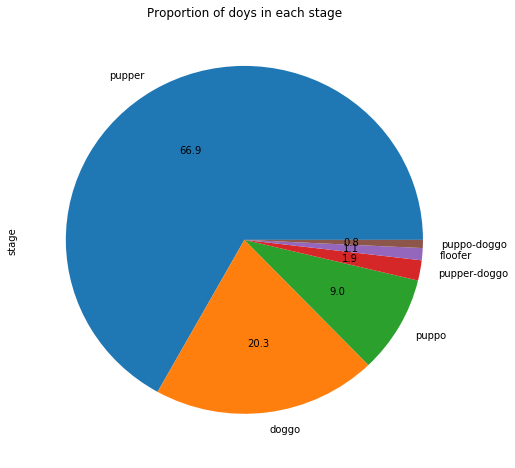

In [36]:
# 分析 狗狗的stage中哪种身份最多?

plt.title("Proportion of doys in each stage")
twitter_archive_master.stage.value_counts().plot(kind="pie",figsize=(8, 8),autopct='%.1f')   

#结论： 可以看到下图，最多的是处于pupper的,有66.9的狗处于这个身份

Lucy       10
Charlie    10
Cooper     10
Oliver      9
Tucker      8
Sadie       7
Winston     7
Penny       7
Daisy       7
Koda        6
Name: name, dtype: int64


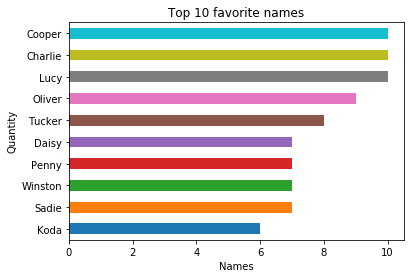

In [37]:
# 分析 数据集中，大家最喜欢给狗狗取什么名字？
plt.title("Top 10 favorite names")
plt.xlabel("Names")
plt.ylabel("Quantity")
print(twitter_archive_master.name.value_counts().iloc[0:10])
twitter_archive_master.name.value_counts().iloc[0:10].sort_values().plot("barh")

#结论，排名前10的最常见的10个名字如下

1.2    407
1.0    356
1.1    348
1.3    214
0.9    134
0.8     68
0.7     31
1.4     22
0.6     16
0.5     14
Name: Final_Grade, dtype: int64


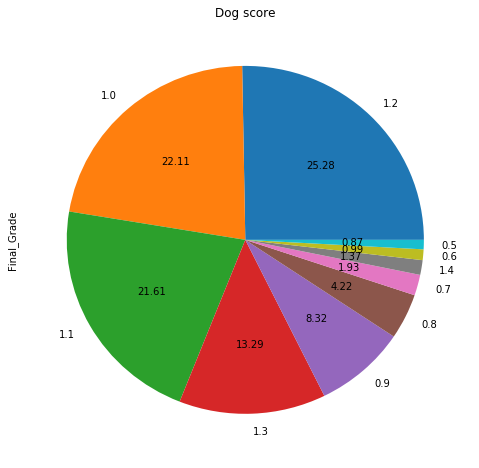

In [38]:
# 分析：数据集中，狗狗的评分大部分是多少？

plt.title("Dog score")

print(twitter_archive_master.Final_Grade.value_counts().iloc[0:10])
twitter_archive_master.Final_Grade.value_counts().iloc[0:10].plot("pie",autopct='%.2f',figsize=(8, 8))

#结论：下图可见最大面积的4个扇形都是1分及以上，22+25+21+13=81，百分之81的狗狗的评分是一分及以上的。

# 分析 - 喜欢数和转发数之间有没有相关性？



In [40]:
two_column = final_Data_clean[['favorite_count','retweet_count']]  

In [41]:
two_column .corr() #返回的相关系数为0.910156 ，说明两个变量之间有强相关性，点赞的，很大可能也会转发。

,favorite_count,retweet_count
favorite_count,1.000000,0.910156
retweet_count,0.910156,1.000000


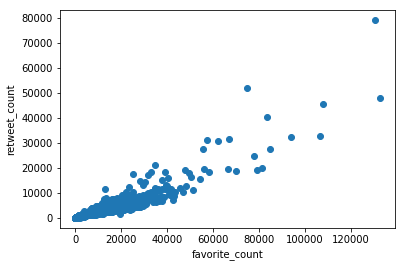

In [42]:
plt.scatter(two_column.favorite_count, two_column.retweet_count)   # 画散点图
plt.scatter(two_column.favorite_count, two_column.retweet_count,)   # 画散点图

plt.xlabel('two_column PEP')
plt.ylabel('Returns KO')
import pylab
pylab.show()